# Proyecto individual de DA: Gaming

## Objetivo de negocio:
Grupo inversor está dispuesto a invertir en el desarrollo de nuevos productos, para ello, nos solicitar lo siguietne:
* Analizar el mercado de videojuegos.
* Identificar posibles nichos para desarrollar nuevos productos.
* Encontrar los insights y presentarlos.

### Preguntas a considerar y responder

* ¿Qué análisis podemos hacer del mercado actual?
* ¿Qué lineamientos generales deberá tener en cuenta el grupo inversor a la hora de determinar el primer juego de la empresa, para lograr aprovechar al máximo las tendencias del mercado, y así lograr el objetivo planteado?
* ¿Qué diferencias encontramos entre las distintas plataformas?
* ¿Qué relación podemos considerar en cuanto a la población e ingresos per cápita de los países?
* ¿En qué regiones conviene enfocarse?
* ¿Podemos determinar algo con respecto a los rangos etarios u otras características demográficas?
* ¿Podemos estimar las ventas de los juegos actuales o al menos de una categoría? Shooters por ejemplo.

### Dataset a utilizar
| Archivos:
| ------
| Indicadores_del_desarrollo_humano_mundial Banco Mundial Indicadores de desarrollo humano.
| Console_sales Reporte de ventas anuales de consolas. por marca y modelo.
| Juegos en steam. Reporte con estadísticas de uso de juegos en Steam. Incluye recomendaciones  tiempo de uso, etc.
| Video Games Sales Reporte de ventas por Video Juego y Plataforma. Incluye ranking y apertura por mercados (NA, EU, Japón y Global).

## Fases de trabajo
1. Análisis exploratorio de datos para determinar las transformaciones de variables apropiadas, identificar patrones, y conclusiones.
2. Construir KPIs que se integren con el dashboard:
   1.  *Aumentar en un 10% las ventas por sector para el próximo trimestre.*
   2.  *Aumentar en un 10% la plataforma Steam.*
3. Construir un dashboard interactivo, funcional utilizando filtros adecuados.
4. Generar un readme.md que describa el desarrollo del proyecto y sus correspondientes conclusiones.
5. Narrar un storytelling en 10'.

> ## 1. Análisis exploratorio de los datos

#### Procesos a realizar:
1. Búsqueda de valores faltantes
2. Valores atípicos u outliers
3. Análisis univariado y bivariado
4. Registros duplicados
5. Conclusiones

#### 1.1. Importar Librería

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import ceil
from scipy.stats import pearsonr

from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### 1.5. Creación del DataFrame 4_Video_games_sales

In [2]:
df_4 = pd.read_csv('dataset/4_Video_games_sales.csv')

In [3]:
df_4

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,NaN,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_4.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         15848 non-null  float64
 6   EU_Sales         15520 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      15341 non-null  float64
 9   Global_Sales     15728 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df_4['Critic_Score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16714     NaN
16715     NaN
16716     NaN
16717     NaN
16718     NaN
Name: Critic_Score, Length: 16719, dtype: float64

Se observa que existen columnas con casi la mitad de filas, por lo cual, no se considerarán.
* Critic_Score
* Critic_Count
* User_Count
* User_Score
* Rating
* Developer

In [7]:
df_4.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [8]:
df_4 = df_4.drop(columns=['Critic_Score', 'Critic_Count', 'User_Count', 'User_Score', 'Rating', 'Developer'])

In [9]:
df_4 = df_4.dropna()

In [10]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12479 entries, 1 to 16717
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             12479 non-null  object 
 1   Platform         12479 non-null  object 
 2   Year_of_Release  12479 non-null  float64
 3   Genre            12479 non-null  object 
 4   Publisher        12479 non-null  object 
 5   NA_Sales         12479 non-null  float64
 6   EU_Sales         12479 non-null  float64
 7   JP_Sales         12479 non-null  float64
 8   Other_Sales      12479 non-null  float64
 9   Global_Sales     12479 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.0+ MB


#### 1.6. Observaciones

* Los tamaños de los DataFrame son pequeños y probablemente no existan problemas al trabarlos en un tablero de control.
* Se han eliminado algunas columnas por datos faltantes. Pero se resolverá en análisis posteriores si se eliminan más por irrelevancia.
* Se observa que el dataframe df_1_1 tiene una estructura rara. Se resolverá más adelante si se normaliza o se deja como está.
* Se ha observado cambiar los nombres de las columnas del df_3 para que queden todos iguales.

#### 2.1. Análisis de nulos

In [11]:
df_4.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

Observaciones:
* No se observan nulos.

#### 3. Búsqueda de valores atípicos o outliers

Para ello, se procederá a graficar valores en histogramas y boxplots.

In [12]:
df_4.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80


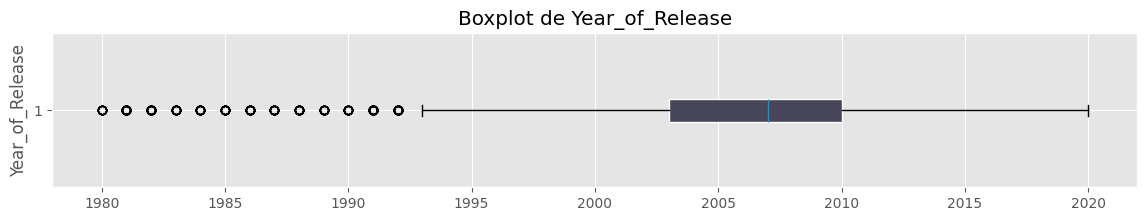

In [13]:
# Crear el boxplot para 'Year_of_Release' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['Year_of_Release'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Year_of_Release')
plt.ylabel('Year_of_Release')
plt.show()

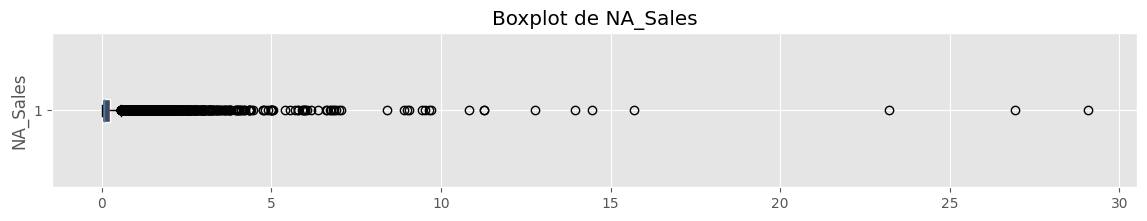

In [14]:
# Crear el boxplot para 'NA_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['NA_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de NA_Sales')
plt.ylabel('NA_Sales')
plt.show()

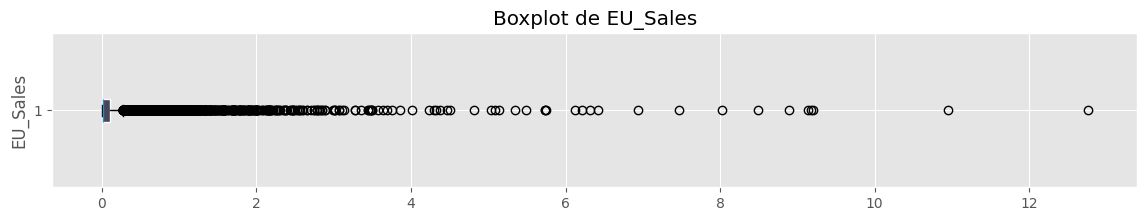

In [15]:
# Crear el boxplot para 'EU_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['EU_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de EU_Sales')
plt.ylabel('EU_Sales')
plt.show()

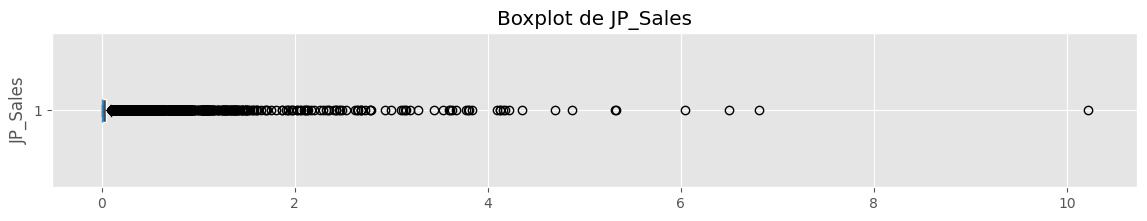

In [16]:
# Crear el boxplot para 'JP_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['JP_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de JP_Sales')
plt.ylabel('JP_Sales')
plt.show()

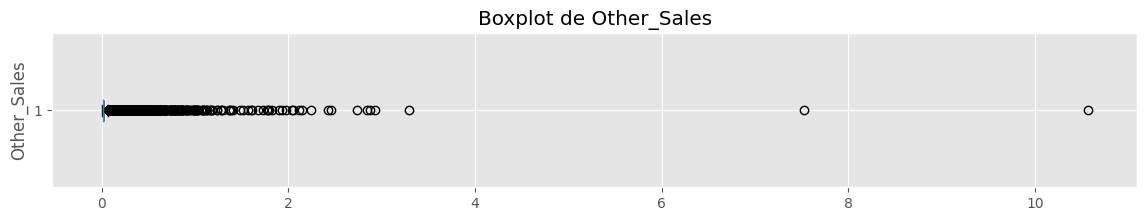

In [17]:
# Crear el boxplot para 'Other_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['Other_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Other_Sales')
plt.ylabel('Other_Sales')
plt.show()

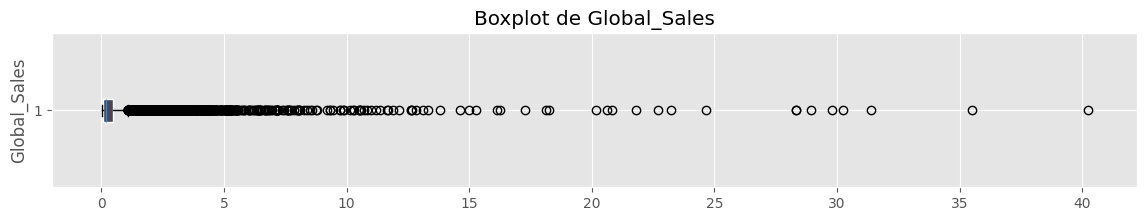

In [18]:
# Crear el boxplot para 'Global_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['Global_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Global_Sales')
plt.ylabel('Global_Sales')
plt.show()

Observaciones:
* Se observan valores outliers pero dentro de la distribución desgada.
* Year_of_Release tiene distribucación sesgada hacia la izquierda lo que quiere decir que la producción de juegos ha ido en aumento.
* Las restantes columnas de Sales tienen distribución sesgada hacia la derecha, lo que quiere decir que la mediana de ventas es de valor entre 0 y 1, pero hay muchos valores dispersos, y cuanto más te alejas menos valores encuentras. Es decir, es dificil lograr grandes ventas en un juego.

#### 4. Análisis de tendencia

#### 5. Análisis de correlación entre variables

In [19]:
df_4.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

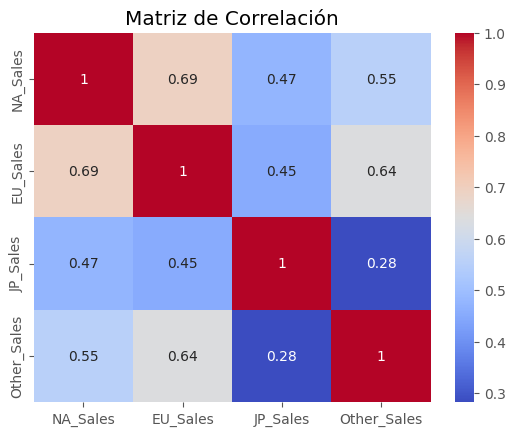

In [20]:
# Calcular la matriz de correlación incluyendo la columna
df_4_corr = df_4[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()

# Visualizar la matriz de correlación
sns.heatmap(df_4_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Observaciones:
* Se observan correlaciones positivas pero no existe multicolinealidad

#### Análisis de duplicados

In [21]:
# Identificar duplicados

duplicated_rows_4 = df_4.duplicated()

# Mostrar filas duplicadas
print("Filas duplicadas:")

print(df_4[duplicated_rows_4])

# Contar el número de filas duplicadas

num_duplicated_rows_4 = duplicated_rows_4.sum()

print(f"Numero de filas duplicadas: {num_duplicated_rows_4}")

if num_duplicated_rows_4 == 0:
    print('No se encuentran duplicadas en el dataframe df_4')

Filas duplicadas:
Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []
Numero de filas duplicadas: 0
No se encuentran duplicadas en el dataframe df_4


#### Exportación de los DataFrames

In [22]:
df_4.to_csv('dataset_clean/Videogames.csv', index=False)

#### Conclusiones